In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy import stats
import folium as folium
from IPython.display import display



### Lectura del archivo Washington.json

In [4]:
df= pd.read_json("Washington.json",lines=True)

In [5]:
df.head()

,user_id,name,rating,text,resp,gmap_id
0,1.148520e+20,Joshua McCormack,5,I feel like not a lot of people know about thi...,None,0x5490143a1a6be1a3:0xcdfc8b297798e8f2
1,1.055213e+20,J V,5,"It's a dive bar with great service, Do not exp...",None,0x5490143a1a6be1a3:0xcdfc8b297798e8f2
2,1.126502e+20,Naomi Ishikawa,4,"Service is good. Food's alright, but...BUT......",None,0x5490143a1a6be1a3:0xcdfc8b297798e8f2
3,1.027241e+20,Edward Hilgendorf,3,"Extremely divey, decent food with crazy select...",None,0x5490143a1a6be1a3:0xcdfc8b297798e8f2
4,1.088590e+20,Christina,5,This is hands down the best dive bar in Seattl...,None,0x5490143a1a6be1a3:0xcdfc8b297798e8f2


### Lectura del archivo "df_gastronomico_ciudades.json "

In [9]:
df2=pd.read_json(r"df_gastronomico_ciudades.json",lines=True)

In [25]:
df2.head()

,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,San Soo Dang,761 S Vermont Ave,Los Angeles,CA 90005,CA,90005,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
1,El Zacatecas Sports Bar,12017 Venice Blvd.,Los Angeles,CA 90066,CA,90066,0x80c2ba5b61bb2415:0x217207f872e3db5e,34.006111,-118.429722,"[Sports bar, Bar]",4.0,18,$,"{'Offerings': ['Alcohol'], 'Amenities': ['Rest..."
2,Gandy Seafood Cajun Market,6917 Lenox Village Dr,Nashville,TN 37211,TN,37211,0x886471d6f8709a51:0x6d2a8beb267fcb54,36.026649,-86.712594,[Seafood market],4.7,28,None,{'From the business': ['Identifies as Black-ow...
3,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
4,Kennedy's Chicken & Sandwiches,495 E 138th St,Bronx,NY 10454,NY,10454,0x89c2f5c3caef3fb5:0xb7f855503b4bc974,40.808010,-73.919617,[Fast food restaurant],3.7,8,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."


### Informacion General

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34946 entries, 0 to 34945
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  34946 non-null  float64
 1   name     34946 non-null  object 
 2   rating   34946 non-null  int64  
 3   text     21130 non-null  object 
 4   resp     3079 non-null   object 
 5   gmap_id  34946 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB
None


In [10]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15277 entries, 0 to 15276
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_local              15277 non-null  object 
 1   direccion                 15277 non-null  object 
 2   ciudad                    15277 non-null  object 
 3   codigo_postal_cod_ciudad  15277 non-null  object 
 4   codigo_ciudad             15277 non-null  object 
 5   codigo_postal             15277 non-null  int64  
 6   gmap_id                   15277 non-null  object 
 7   latitude                  15277 non-null  float64
 8   longitude                 15277 non-null  float64
 9   category                  15277 non-null  object 
 10  avg_rating                15277 non-null  float64
 11  num_of_reviews            15277 non-null  int64  
 12  price                     7188 non-null   object 
 13  MISC                      14901 non-null  object 
dtypes: flo

### Descripción de los dataframe

In [13]:
df['rating'].describe()


count    34946.000000
mean         4.243175
std          1.116475
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [18]:
df2.describe()

,codigo_postal,latitude,longitude,avg_rating,num_of_reviews
count,15277.000000,15277.000000,15277.000000,15277.000000,15277.000000
mean,63540.102965,37.100113,-96.745565,4.141140,72.121228
std,27480.498860,5.508495,16.191370,0.591998,146.189725
min,1011.000000,26.008781,-149.817309,1.000000,1.000000
25%,39705.000000,33.732776,-118.252445,3.900000,18.000000
50%,75034.000000,37.332240,-95.195599,4.200000,38.000000
75%,90013.000000,41.786243,-84.456886,4.600000,84.000000
max,99694.000000,61.629851,-69.393765,5.000000,5137.000000


### Análisis de Datos Nulos

In [14]:
print(df.isnull().sum())


user_id        0
name           0
rating         0
text       13816
resp       31867
gmap_id        0
dtype: int64


In [19]:
print(df2.isnull().sum())


nombre_local                   0
direccion                      0
ciudad                         0
codigo_postal_cod_ciudad       0
codigo_ciudad                  0
codigo_postal                  0
gmap_id                        0
latitude                       0
longitude                      0
category                       0
avg_rating                     0
num_of_reviews                 0
price                       8089
MISC                         376
dtype: int64


### Outliers

Outliers en la columna 'rating' usando IQR:
8        1
11       1
13       2
25       1
28       1
        ..
34695    2
34698    1
34723    1
34745    1
34798    2
Name: rating, Length: 3194, dtype: int64
Outliers en la columna 'rating' usando Z-score:
Series([], Name: rating, dtype: int64)


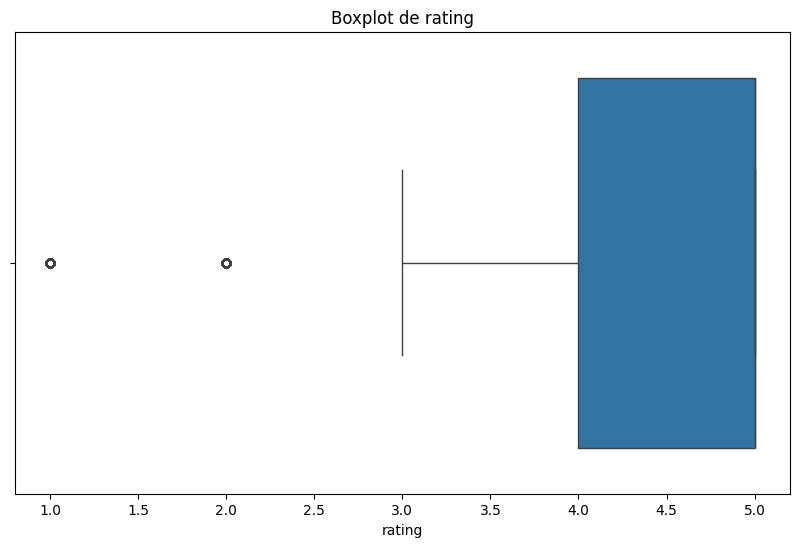

In [38]:
rating = df['rating']

# Calcular el IQR para la columna 'rating'
Q1 = rating.quantile(0.25)
Q3 = rating.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando IQR
outliers_iqr = rating[(rating < (Q1 - 1.5 * IQR)) | (rating > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'rating' usando IQR:")
print(outliers_iqr)

# Calcular Z-score para la columna 'rating'
z_scores = stats.zscore(rating)
abs_z_scores = abs(z_scores)

# Identificar outliers con Z-score mayor que 3
outliers_z = rating[abs_z_scores > 3]
print("Outliers en la columna 'rating' usando Z-score:")
print(outliers_z)

# Graficar el boxplot para 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x=rating)
plt.title('Boxplot de rating')
plt.show()


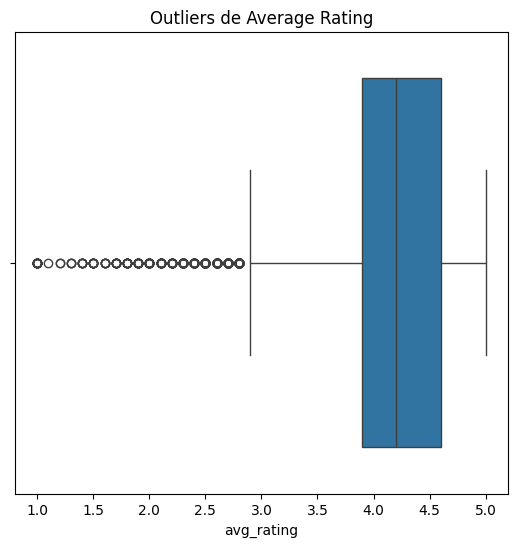

In [43]:


columns_to_check = ['avg_rating']

Q1 = df2[columns_to_check].quantile(0.25)
Q3 = df2[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df2[(df2[columns_to_check] < (Q1 - 1.5 * IQR)) | (df2[columns_to_check] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['avg_rating'])
plt.title('Outliers de Average Rating')



plt.show()



Outliers en la columna 'num_of_reviews' usando IQR:
38       267
121      267
407      208
594      236
731      193
        ... 
15257    316
15258    566
15262    198
15264    232
15266    258
Name: num_of_reviews, Length: 1054, dtype: int64
Outliers en la columna 'num_of_reviews' usando Z-score:
1011      548
3330      576
3519      518
3722      798
4435     1393
         ... 
14845     608
14847     556
15032     528
15142     594
15258     566
Name: num_of_reviews, Length: 155, dtype: int64


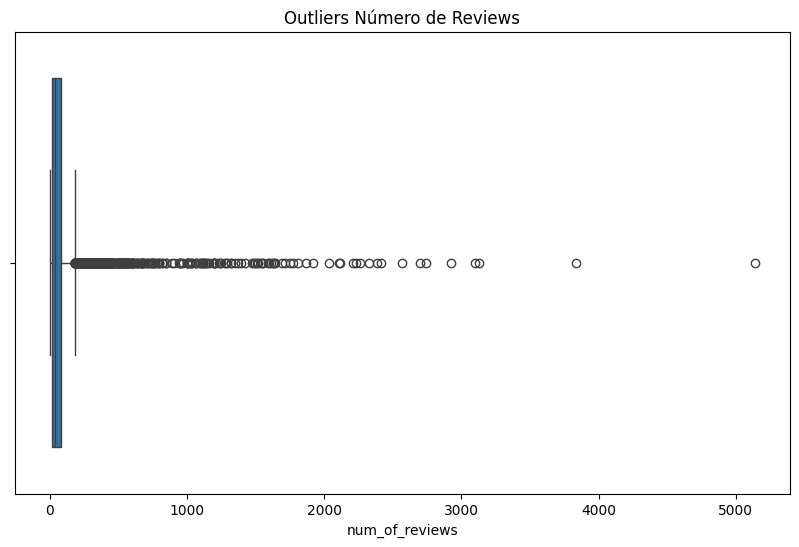

In [42]:

num_of_reviews = df2['num_of_reviews']

# Calcular el IQR para la columna 'num_of_reviews'
Q1 = num_of_reviews.quantile(0.25)
Q3 = num_of_reviews.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando IQR
outliers_iqr = num_of_reviews[(num_of_reviews < (Q1 - 1.5 * IQR)) | (num_of_reviews > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'num_of_reviews' usando IQR:")
print(outliers_iqr)

# Calcular Z-score para la columna 'num_of_reviews'
z_scores = stats.zscore(num_of_reviews)
abs_z_scores = abs(z_scores)

# Identificar outliers con Z-score mayor que 3
outliers_z = num_of_reviews[abs_z_scores > 3]
print("Outliers en la columna 'num_of_reviews' usando Z-score:")
print(outliers_z)

# Graficar el boxplot para 'num_of_reviews'
plt.figure(figsize=(10, 6))
sns.boxplot(x=num_of_reviews)
plt.title('Outliers Número de Reviews')
plt.show()


### Histogramas de distribución

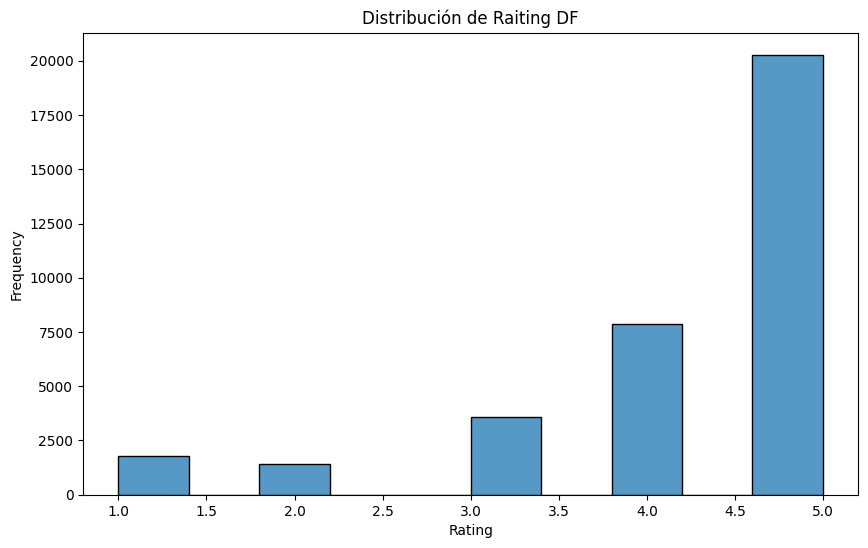

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10)
plt.title('Distribución de Raiting DF')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


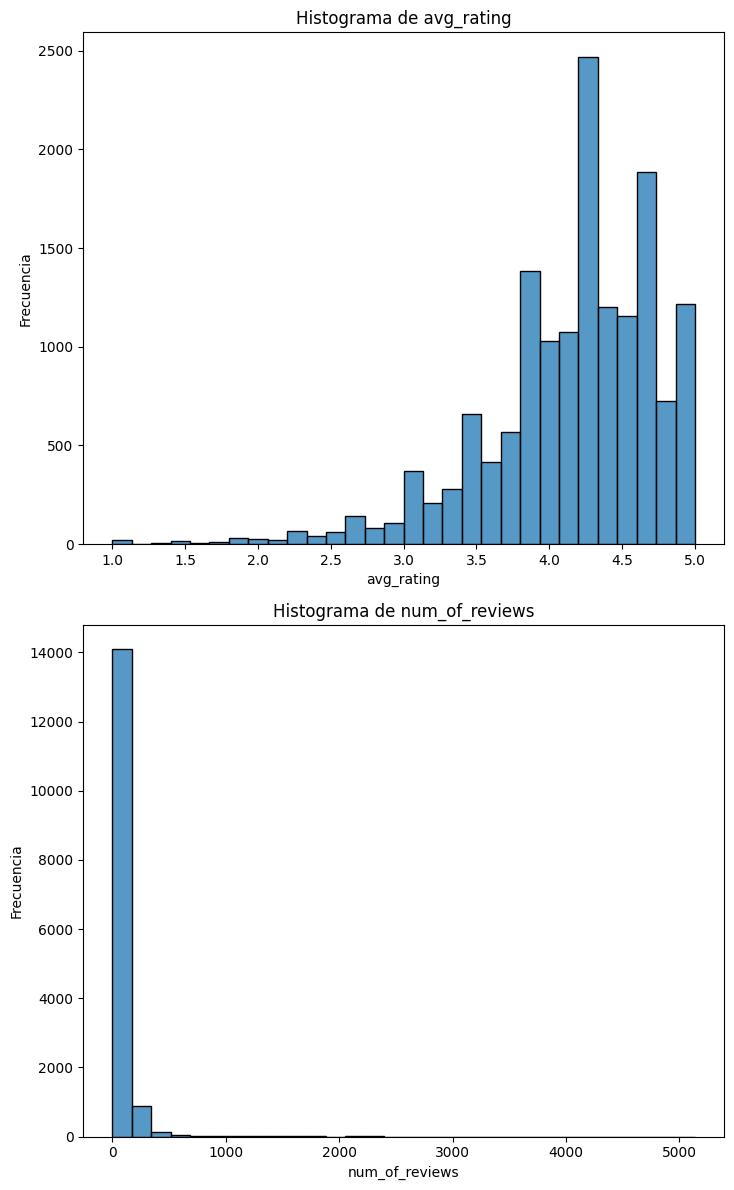

In [46]:
avg_rating = df2['avg_rating']
num_of_reviews = df2['num_of_reviews']

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(avg_rating, bins=30, kde=False)
plt.title('Histograma de puntaje promedio')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(num_of_reviews, bins=30, kde=False)
plt.title('Histograma de número de reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Análisis de sentimientos 

In [11]:
df['text'] = df['text'].fillna('')


In [15]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['review_sentiment'] = df['text'].apply(get_sentiment)

print(df[['text', 'review_sentiment']].head())


                                                text  review_sentiment
0  I feel like not a lot of people know about thi...          0.354762
1  It's a dive bar with great service, Do not exp...          0.866667
2  Service is good.  Food's alright, but...BUT......          0.362500
3  Extremely divey, decent food with crazy select...         -0.039872
4  This is hands down the best dive bar in Seattl...          0.448148


Text(0, 0.5, 'Frecuencia')

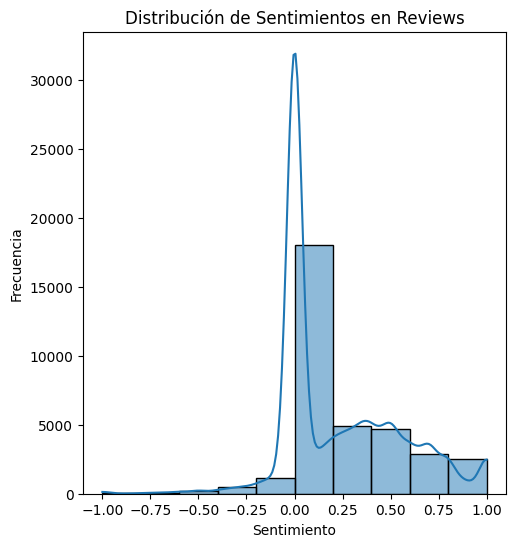

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['review_sentiment'], bins=10, kde=True)
plt.title('Distribución de Sentimientos en Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')


### Unión de datasets

In [49]:
df = df.drop_duplicates(subset=['gmap_id'])
df2 = df2.drop_duplicates(subset=['gmap_id'])


In [50]:
merged_df = pd.merge(df, df2, on='gmap_id', how='inner')


In [52]:
merged_df

,user_id,name,rating,text,resp,gmap_id,review_sentiment,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,1.148520e+20,Joshua McCormack,5,I feel like not a lot of people know about thi...,None,0x5490143a1a6be1a3:0xcdfc8b297798e8f2,0.354762,Ed's Kort Haus,6732 Greenwood Ave N,Seattle,WA 98103,WA,98103,47.678611,-122.355000,[Hamburger restaurant],4.0,14,None,"{'Service options': ['Delivery'], 'Highlights'..."
1,1.113396e+20,Toge Inumaki,5,As much as I don't want to make this place mor...,None,0x549015dcda35c8b5:0x59acf0fabf61e550,0.248087,Citizen Campfire Beer Garden,706 Taylor Ave N,Seattle,WA 98109,WA,98109,47.625712,-122.345954,"[Bar & grill, Bar, Restaurant]",4.0,7,None,"{'Service options': ['Curbside pickup', 'No-co..."
2,1.021028e+20,Jennifer Wong,2,The food is great. Management is terrible. The...,None,0x549015417a8f971d:0xfeeed6ecbc43eea1,0.126786,Boca Restobar and Grill,2201 1st Ave,Seattle,WA 98121,WA,98121,47.612557,-122.345584,[Argentinian restaurant],4.4,28,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,1.024338e+20,Alysia E,4,Best french food we've found in Seattle. Servi...,None,0x5490408590156daf:0x8739b7c2efd6688e,0.424074,Marée Bistro & Bar,2820 Alki Ave SW #2788,Seattle,WA 98116,WA,98116,47.578258,-122.412894,"[French restaurant, Bar & grill, Bistro]",4.6,27,$$,"{'Service options': ['Delivery'], 'Highlights'..."
4,1.056150e+20,Dunia Izaguirre,5,The best bakery 🥯🥰,None,0x549041beda00de25:0x806600c86c163420,1.000000,The Essential Bakery Cafe- Georgetown,5601 1st Ave S,Seattle,WA 98108,WA,98108,47.552318,-122.334595,"[Wholesale bakery, Bakery]",3.8,48,None,{'Accessibility': ['Wheelchair accessible entr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1.104682e+20,Grace Farnham,5,I went there on a Saturday around 4. The atmos...,None,0x5490152737e8e8ad:0xb31731a334f45a63,0.334091,Zeeks Pizza,1830 E Mercer St,Seattle,WA 98112,WA,98112,47.624535,-122.307531,"[Pizza restaurant, Beer hall, Family restauran...",4.5,98,$$,"{'Service options': ['Outdoor seating', 'Curbs..."
643,1.050190e+20,Selena Krivoruchko,4,Nice cozy wine bar. Love the vibe! I would def...,None,0x54906b80cfd18cab:0xbeba7fb0c58f5ae3,0.256250,La Dive,721 E Pike St,Seattle,WA 98122,WA,98122,47.613893,-122.322493,[Wine bar],4.8,38,None,"{'Service options': ['Takeout'], 'Health & saf..."
644,1.161052e+20,Steve Cook,4,This is my neighborhood teriyaki joint. The fo...,None,0x54901153065c11ed:0x90c46a0065789aed,0.550000,Teriyaki Plus,2100 N Northgate Way b,Seattle,WA 98133,WA,98133,47.708999,-122.333639,"[Japanese restaurant, Asian restaurant]",4.3,126,$,"{'Service options': ['Takeout', 'Dine-in'], 'H..."
645,1.024089e+20,STRUT FILMS,5,Everything I tasted was delicious! The atmosph...,None,0x549017f4f9cc76d1:0xffd1d559ba76f91,0.554167,Celest Gluten Free Bakery & Vegan Cafe,1100 N 115th St,Seattle,WA 98133,WA,98133,47.712448,-122.344399,"[Takeout Restaurant, Bakery, Food and beverage...",4.7,38,None,"{'Service options': ['Takeout', 'Delivery'], '..."


In [66]:
if 'latitude' in merged_df.columns and 'longitude' in merged_df.columns:
    # Crear un mapa centrado en una ubicación aproximada de Washington
    m = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

    # Agregar marcadores para cada local
    for index, row in merged_df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Local: {row['nombre_local']}<br>Avg Rating: {row['avg_rating']}<br>Num of Reviews: {row['num_of_reviews']}",
            tooltip=row['nombre_local']
        ).add_to(m)

    display(m)
else:
    print("Las columnas 'latitude' y 'longitude' no existen en el DataFrame.")
